In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
customer_segment_data=pd.read_csv('Mall_Customers.csv')
customer_segment_data

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
customer_segment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
customer_segment_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
customer_segment_data.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


In [5]:
customer_segment_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
X=customer_segment_data.iloc[:,3:].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [9]:
standardized_data = scaler.transform(X)
X=standardized_data
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [10]:
from sklearn.cluster import KMeans

cluster_iteration = range(1,10)
scores = []

for cluster_number in cluster_iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(X)
    scores.append(K_Means.score(X))
scores

[-399.99999999999994,
 -270.026160844515,
 -157.70400815035947,
 -108.92131661364357,
 -65.56840815571681,
 -55.057348270386,
 -45.33255486071675,
 -37.24595372674166,
 -33.85410621736368]

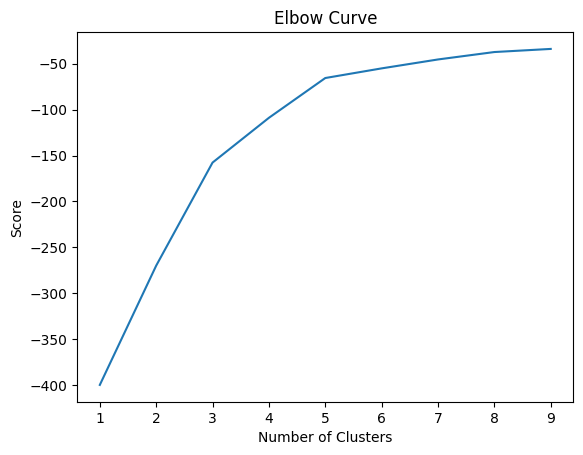

In [11]:
plt.plot(cluster_iteration,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(cluster_iteration)
plt.style.use('ggplot')
plt.show()

In [12]:
K_Means_final_model = KMeans(n_clusters= 6, random_state=45)
K_Means_final_model.fit(X)

KMeans(n_clusters=6, random_state=45)

In [13]:
cluster_labels = K_Means_final_model.labels_
cluster_labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5])

In [14]:
customer_segment_data['cluster'] = cluster_labels
customer_segment_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,2
197,198,Male,32,126,74,5
198,199,Male,32,137,18,2


In [15]:
customer_segment_data['cluster'].value_counts()


1    81
2    35
3    29
4    23
0    22
5    10
Name: cluster, dtype: int64

In [16]:
customer_segment_data.groupby('cluster').agg({'Annual Income (k$)': 'mean',
                            'Spending Score (1-100)': ['mean', 'count'],}).round(0)

Annual Income (k$) Spending Score (1-100)      
                      mean                   mean count
cluster                                                
0                     26.0                   79.0    22
1                     55.0                   50.0    81
2                     88.0                   17.0    35
3                     79.0                   82.0    29
4                     26.0                   21.0    23
5                    110.0                   82.0    10

In [17]:
Y = cluster_labels

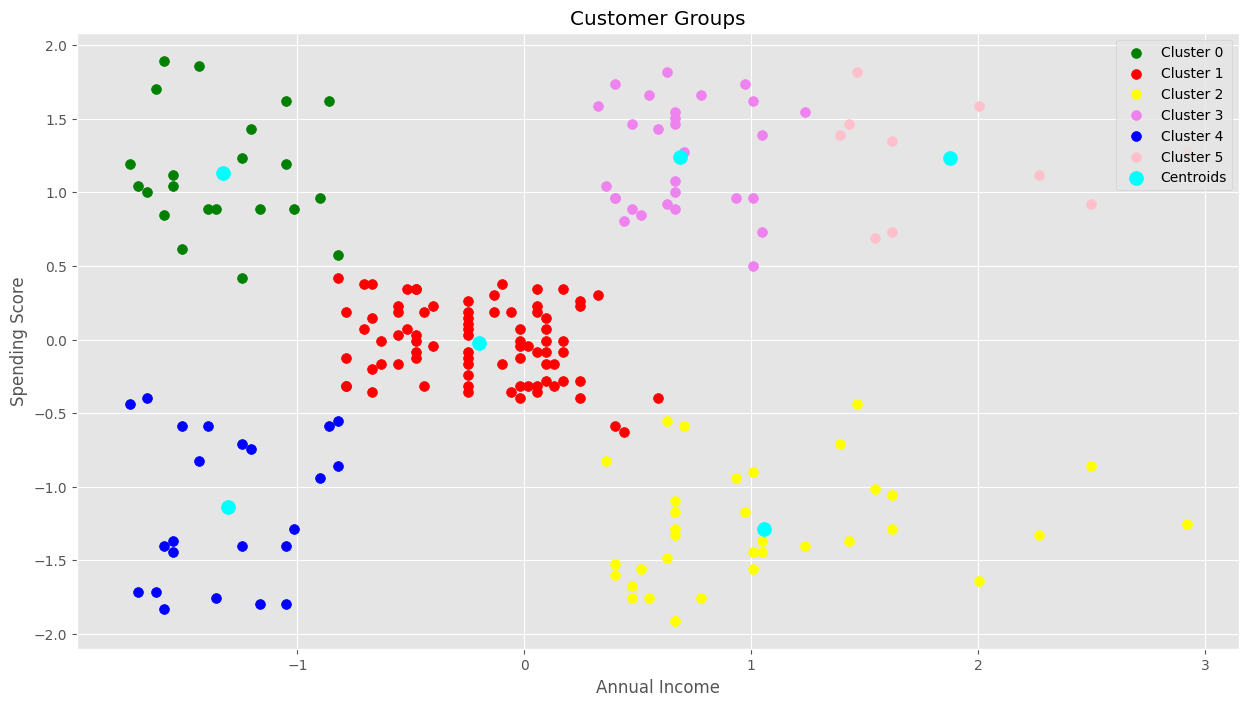

In [18]:
plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 0')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 3')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='pink', label='Cluster 5')
plt.scatter(K_Means_final_model.cluster_centers_[:,0], K_Means_final_model.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.legend(loc='upper right')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()